In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Perceptron

Before we get into neural networks, we need to talk about perceptron models. Perceptron models will form the basis of Neural Networks. The models themselves are heavily indebted to linear regression which was one of the first models we covered.

## Conceptual Basis

Remember the initial specification for a linear regression?

$$ y = \alpha + \beta X $$

The other key aspect of linear regression is our cost function. In the linear regression context, we are trying to minimize the squared error terms. 

Perceptrons rely on that same linear specification but use it for a different purpose. Firstly, perceptrons are classifiers, at their core binary classifiers (though much like other methods there are ways to expand them to work with multiple classes). This takes our functional form and turns it into a rule to classify into groups A and B.

$$ \alpha + \beta X \geq 0 : A $$
$$ \alpha + \beta X < 0 : B $$

Here the $\alpha$ is the _shift_, a way of regularizing the boundary to zero. Then $\beta$ is the _weight_, which controls the influence of each variable in a linear fashion much like OLS.

Recall in linear regression we minimize the error. In SVM the goal was to create the largest margin between our boundary and the nearest data points of each class. For Perceptron models, the cost we are trying to minimize is the sum of the output of our functional form from all misclasified examples. This can be thought of as minimizing the error for the classifier.  So if we create a boundary with errors, we take the absolute value of the misclasified observations and sum them together for our cost. Based on this cost function all boundries that correctly divide all data points into classes with no errors will have the same cost: zero.

It's important to note that in this kind of simple perceptron the outcome is binary. A result is either in class A or class B with no probability given or gradient permitted. When working with perceptrons, it is common practice to invoke a curve with a gradient to it, meaning the prediction takes non-binary values between zero and one.

The most common curve to use is called the _logistic function_ or _sigmoid curve_ because it gives a nice "S" or sigmoid shaped curve. The formula for that function is:

$$ \frac{1}{1+e^{-x}} $$

Using this for perceptrons means outputting the value from our linear model into this function rather than simply using binary values for 0 if less than 0 and 1 if greater than 0. Allowing for continuous outputs from a perceptron will be valuable in allowing for more subtlety in our perceptron and thus in our neural networks.

## Perceptrons in Practice

Now let's go through a perceptron in practice. To do so let's bring back the example from SVM: student test data.

In [11]:
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

In [12]:
# Import Perceptron.
from sklearn.linear_model import Perceptron

# Establish X and Y.
X = test_data[['test', 'project']]
Y = test_data['pass']

# Establish Perceptron Model.
# 10,000 iterations to ensure accuracy since data is non-normalized.
perceptron = Perceptron(n_iter=10000)

# Fit Perceptron.
perceptron.fit(X, Y)

# Get Parameters.
print('Score: ' + str(perceptron.score(X, Y)))

test_x_input = [100, 100]
print('Test: ' + str(perceptron.predict(test_x_input)))

Score: 1.0
Test: ['fail']


/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Let's use the same mesh we've used previously to create and show our perceptron border.

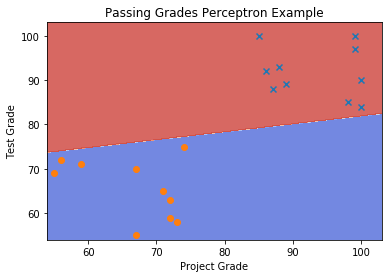

In [13]:
# Establish a mesh for our plot.
x_min, x_max = X.test.min() - 1, X.test.max() + 3
y_min, y_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

# Predict over that mesh.
Z = (perceptron.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')


# Reshape the prediction to be plottable.
Z = Z.reshape(xx.shape)

# Plot the mesh.
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot our two scatters.
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

# Aesthetics.
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades Perceptron Example')
plt.show()

Now, this is clearly different from the optimal SVM model. The simplicity of the perceptron cost function means that this is totally satisfactory to the model: every point is correctly classified so the cost is zero, and the perceptron algorithm stops as soon as that condition is met. Until it meets that condition, however, it keeps trying new things to see if it can get a successful classifier.

If all of this seems rather inefficient that's because it often is. That decision boundary looks inefficient to the human eye. It took a lot of iterations to get there. There are many techniques that are more useful on their own.

However, here you should think of the decision tree. Decision trees are not always a great model on their own, but through boosting or random forest we were able to craft some of the most powerful models in machine learning. The same is true with the perceptron.

That's because a neural network, when you get down to it, is just an ensemble of perceptrons.